In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# use the correct path to where you saved the foodtruck data file
data = pd.read_csv('SIT720.3-Step1.08-foodtruck_profits.txt', delimiter=',', header=None).values
print("Data shape: {}".format(data.shape))
print('The first few lines of data: {}'.format(data[0:5,:]))

Data shape: (100, 2)
The first few lines of data: [[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


Text(0, 0.5, 'Profit in $10,000s')

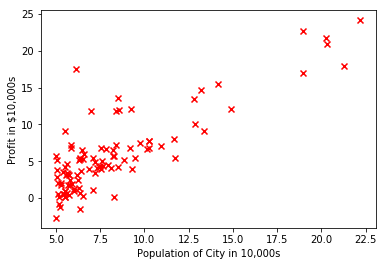

In [14]:
# create a scatter plot using matplot
plt.scatter(data[:,0],data[:,1], color="red", marker="x",)
# add x and y axis labels
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')


In [15]:
# add a variable and find the length of the data
m = len(data)

# we change the one-dimensional data into a matrix form 
X = np.matrix(data[:,0]).T
y = np.matrix(data[:,1]).T

print("Number of examples: {}".format(m))
print("Shape of data     : {}".format(X.shape))
print("Shape of labels   : {}".format(y.shape))

Number of examples: 100
Shape of data     : (100, 1)
Shape of labels   : (100, 1)


In [16]:
# add intercept term to data X
X = np.c_[np.ones(m), X] #np.c_ helps in appending columns

print("New shape of data: {}".format(X.shape))


New shape of data: (100, 2)


In [18]:
# Closed form solution

#Compute inverse of (Xtranspose * X)
temp1 = np.linalg.pinv(np.dot(X.T,X))

#Computer Xtranspose * y
temp2 = np.dot(X.T,y)

W = np.dot(temp1,temp2)
print (W.shape)

print (W)


(2, 1)
[[-3.95911545]
 [ 1.19673809]]


Text(0, 0.5, 'Profit in 10,000s')

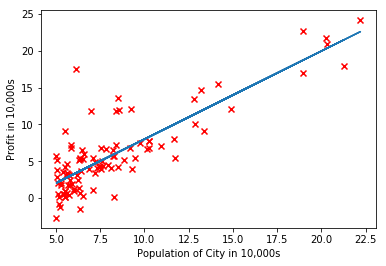

In [19]:
plt.scatter(data[:,0],data[:,1], color="red", marker="x",)
plt.plot(X[:,1], np.dot(X,W)) #regression line

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in 10,000s')


In [20]:
# 17.5 x 10,000 = 175,000 population so we use x = 17.5
predicted_profit = np.dot([1,17.5], W)
# Predicted profit needs to be multiplied by y units, 10,000, and rounded to be currency
print ("Start by finding the y value at x = 17.5: {}".format(predicted_profit))
# multiply by 10,000 because that's the y unit
multiplied_profit = predicted_profit * 10000           
# round to two decimal places so it looks like money
final_profit = np.around(multiplied_profit, decimals = 2)
print ("For a population of 175,000, we predict a profit of: {}".format(final_profit))


Start by finding the y value at x = 17.5: [[16.98380112]]
For a population of 175,000, we predict a profit of: [[169838.01]]
